## **Machine Learning Final Project DUE: May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

Show clear exploration of the data to justify model choice

Train mutliple models and clearly articulate why you chose your final model

Show your performance on test dataset

Clear and concise write-up with clear well-documented figures

Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [69]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn.metrics as sm


# Linear regression and other model libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression


In [70]:
# READ DATA INTO DF
df = pd.read_csv('Player_Attributes.csv')


# Explore the data
# print(df.head())
print(df)
print(df.describe())

           ID FIRST_NAME     LAST_NAME  ...   REB ALL_STAR_APPEARANCES    PIE
0       76001       Alaa     Abdelnaby  ...   3.3                  0.0    NaN
1       76002       Zaid    Abdul-Aziz  ...   8.0                  0.0    NaN
2       76003     Kareem  Abdul-Jabbar  ...  11.2                 18.0    NaN
3          51    Mahmoud    Abdul-Rauf  ...   1.9                  0.0    NaN
4        1505      Tariq   Abdul-Wahad  ...   3.3                  0.0    NaN
...       ...        ...           ...  ...   ...                  ...    ...
4495  1627790       Ante         Zizic  ...   3.9                  0.0    NaN
4496    78647        Jim          Zoet  ...   1.1                  0.0    NaN
4497    78648       Bill          Zopf  ...   0.9                  0.0    NaN
4498  1627826      Ivica         Zubac  ...   7.0                  NaN  0.126
4499    78650       Matt         Zunic  ...   NaN                  0.0    NaN

[4500 rows x 37 columns]
                 ID       HEIGHT  ... 

**Data Wrangling and Cleaning**

In order to prepare the data for modeling, I will first clean up the raw data by checking for missing values. Then I will drop any unnecessary columns and remove any rows that are missing values in crucial columns.

In [71]:
# Check for missing values
print(df.isnull().any())
print(df.isnull().sum())

# Drop all the rows that are missing the number of 'All star appearances' they have
dfClean = df.dropna(subset=['ALL_STAR_APPEARANCES'])
print(dfClean.isnull().any())

# Drop unnecessary columns
dfClean = dfClean.drop(columns=['JERSEY', 'TEAM_ID', 'TEAM_CODE', 'PLAYERCODE', 'GAMES_PLAYED_CURRENT_SEASON_FLAG','PIE'])
print(dfClean)


ID                                  False
FIRST_NAME                          False
LAST_NAME                           False
DISPLAY_FIRST_LAST                  False
DISPLAY_LAST_COMMA_FIRST            False
DISPLAY_FI_LAST                     False
PLAYER_SLUG                         False
BIRTHDATE                           False
SCHOOL                               True
COUNTRY                             False
LAST_AFFILIATION                    False
HEIGHT                               True
WEIGHT                               True
SEASON_EXP                          False
JERSEY                               True
POSITION                             True
ROSTERSTATUS                        False
GAMES_PLAYED_CURRENT_SEASON_FLAG    False
TEAM_ID                             False
TEAM_NAME                            True
TEAM_ABBREVIATION                    True
TEAM_CODE                            True
TEAM_CITY                            True
PLAYERCODE                        

**Exploring and Visualizing the Data**

In order to explore how certain attributes of interest relate to an NBA player's number of All Star appearances, I will create visualizations of these relationships using scatter plots. 



Text(0.5, 0.98, 'All Star Appearances')

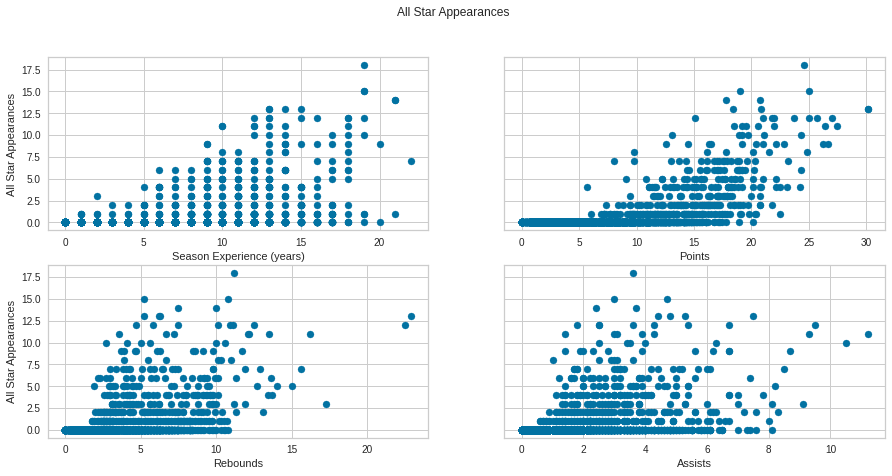

In [72]:
fig, myAxes = plt.subplots(2, 2, sharex=False, sharey=True) # share y axis

fig.set_figheight(7)
fig.set_figwidth(15)

myAxes[0,0].scatter(dfClean['SEASON_EXP'], dfClean['ALL_STAR_APPEARANCES'])
myAxes[0,1].scatter(dfClean['PTS'], dfClean['ALL_STAR_APPEARANCES'])
myAxes[1,0].scatter(dfClean['REB'], dfClean['ALL_STAR_APPEARANCES'])
myAxes[1,1].scatter(dfClean['AST'], dfClean['ALL_STAR_APPEARANCES'])

# Set y labels
myAxes[0,0].set_ylabel('All Star Appearances')
myAxes[1,0].set_ylabel('All Star Appearances')

#Set x labels
myAxes[0,0].set_xlabel('Season Experience (years)')
myAxes[1,0].set_xlabel('Rebounds')

myAxes[0,1].set_xlabel('Points')
myAxes[1,1].set_xlabel('Assists')



# myAxes[1,0].set_ylim([0.8,2])
fig.suptitle('All Star Appearances')



**Visualizing Correlation Matrix and Pairplot**

In [73]:
dfCorr = dfClean[["PTS", "REB", "AST", "SEASON_EXP", "ALL_STAR_APPEARANCES"]]

# TODO: drop undrafted and none
# dfCorr = dfCorr[dfCorr['DRAFT_ROUND'] != 'None']
# dfCorr = dfCorr[dfCorr['DRAFT_ROUND'] != 'Undrafted']

dfCorr.corr()

,PTS,REB,AST,SEASON_EXP,ALL_STAR_APPEARANCES
PTS,1.000000,0.674920,0.669945,0.692824,0.602444
REB,0.674920,1.000000,0.268086,0.575345,0.472514
AST,0.669945,0.268086,1.000000,0.518743,0.422739
SEASON_EXP,0.692824,0.575345,0.518743,1.000000,0.428702
ALL_STAR_APPEARANCES,0.602444,0.472514,0.422739,0.428702,1.000000


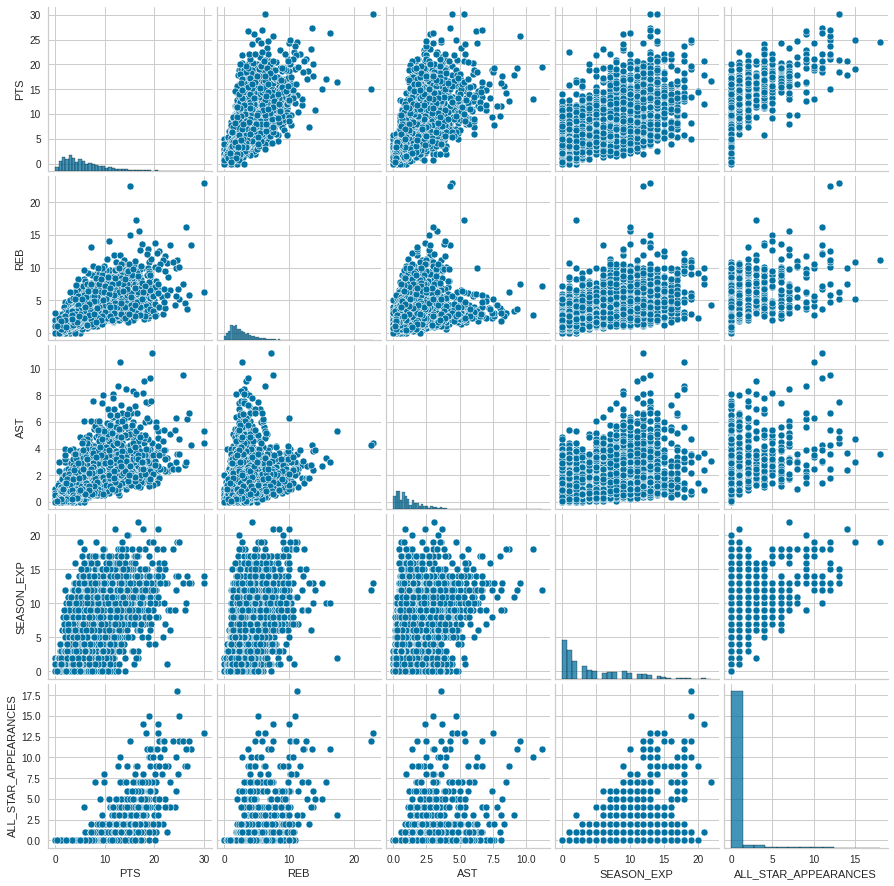

In [74]:
# Pairplot
sb.pairplot(dfCorr)

**Which NBA players have the most All-Star Appearances?**

          ID FIRST_NAME     LAST_NAME  ...  AST   REB ALL_STAR_APPEARANCES
2      76003     Kareem  Abdul-Jabbar  ...  3.6  11.2                 18.0
1074    1495        Tim        Duncan  ...  3.0  10.8                 15.0
534      977       Kobe        Bryant  ...  4.7   5.2                 15.0
2967    1717       Dirk      Nowitzki  ...  2.4   7.5                 14.0
1358     708      Kevin       Garnett  ...  3.7  10.0                 14.0
...      ...        ...           ...  ...  ...   ...                  ...
1584   76926     Dennis      Hamilton  ...  0.6   1.5                  0.0
1585  202706     Jordan      Hamilton  ...  0.8   2.8                  0.0
1586  203120     Justin      Hamilton  ...  0.8   3.6                  0.0
1587   76927      Ralph      Hamilton  ...  1.7   NaN                  0.0
4499   78650       Matt         Zunic  ...  0.9   NaN                  0.0

[4056 rows x 31 columns]


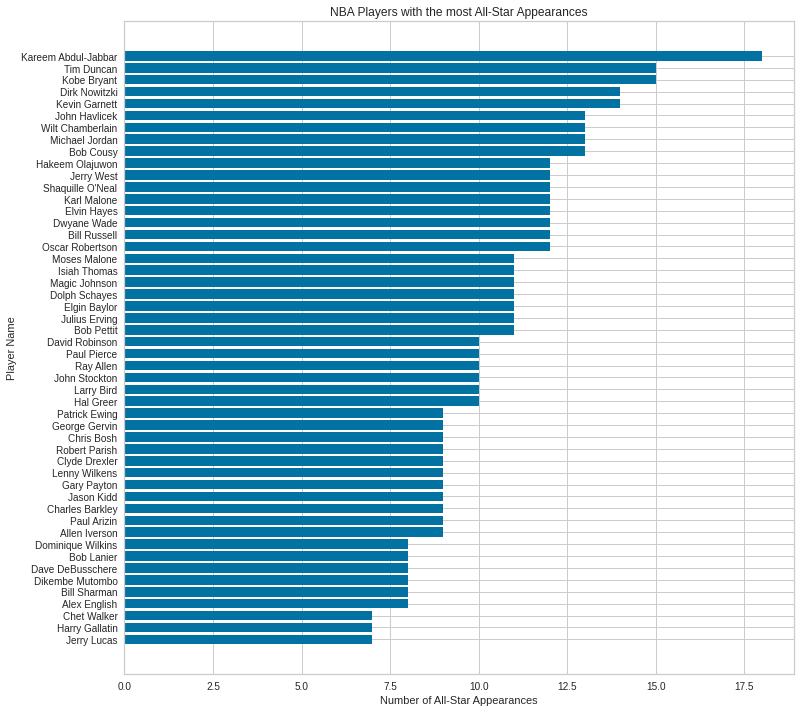

In [75]:
# Sort the df by All-Star appearances
dfSorted = dfClean.sort_values(by='ALL_STAR_APPEARANCES', ascending=False)
print(dfSorted)

# Get the top 50
top50 = dfSorted.head(50)

# Set figure size
plt.figure(figsize=(12, 12))

# Labels
plt.title("NBA Players with the most All-Star Appearances")
plt.xlabel("Number of All-Star Appearances")
plt.ylabel("Player Name")

plt.barh(top50['DISPLAY_FIRST_LAST'], top50['ALL_STAR_APPEARANCES'], align='center')

# Invert bar order
plt.gca().invert_yaxis()



In [76]:
# Display the number of players with zero All Star appearances vs. at least one
dfSorted.value_counts(dfSorted['ALL_STAR_APPEARANCES'] > 0)

ALL_STAR_APPEARANCES
False    3687
True      369
dtype: int64

**Which NBA teams have the most All-Stars?**

                     ID   HEIGHT   WEIGHT  ...    REB  ALL_STAR_APPEARANCES    PIE
TEAM_NAME                                  ...                                    
Lakers         27920263  13230.0  35699.0  ...  584.3                 142.0  1.440
Celtics        35953820  13817.0  37223.0  ...  495.8                 124.0  1.368
Pistons        35799062  15690.0  41723.0  ...  624.6                 120.0  1.066
76ers          30567862  10266.0  27688.0  ...  429.3                  91.0 -0.421
Knicks         36400081  15730.0  41579.0  ...  562.9                  86.0  1.094
Hawks          40655421  15480.0  41465.0  ...  562.1                  74.0  1.292
Warriors       31902884  16691.0  44114.0  ...  623.7                  67.0  1.041
Rockets        34192400   9148.0  24613.0  ...  372.1                  54.0  1.154
Royals          6308022   5240.0  13856.0  ...  253.2                  49.0  0.000
Spurs          28844543   7876.0  21410.0  ...  301.1                  47.0  1.233
Suns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

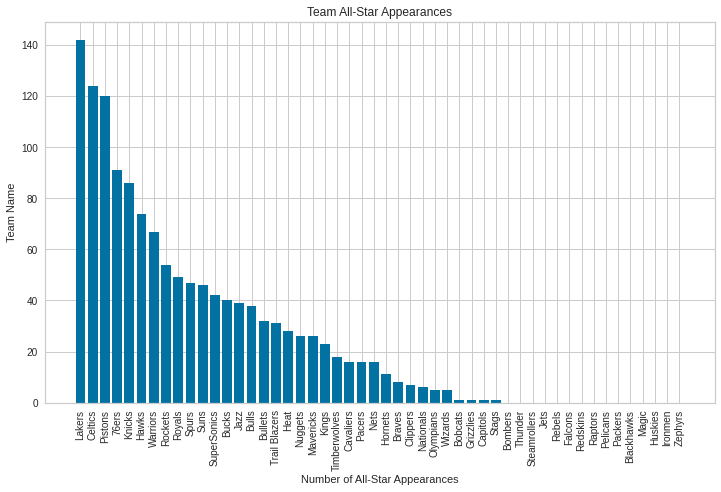

In [77]:
# Drop rows that don't have a team name
dfClean2 = df.dropna(subset=['TEAM_NAME'])

# Group by All-Star Appearances
asa = dfClean2.groupby('TEAM_NAME').sum()

# Sort the teams by number of All-Star appearances
asa = asa.sort_values(by='ALL_STAR_APPEARANCES', ascending=False)
print(asa)

# Set figure size
plt.figure(figsize=(12, 7))

# Add title
plt.title("Team All-Star Appearances")

# Add labels
plt.xlabel('Number of All-Star Appearances')
plt.ylabel('Team Name')

# Plot a bar graph showing the number of all star appearances each NBA team has (show aggregate sum, not max)
plt.bar(asa.index, asa['ALL_STAR_APPEARANCES'], align='center')

# Rotate team names
plt.xticks(rotation = 90)

**Modeling the relationship between points and All-Star appearances**

**Linear Regression on PTS vs. All Star Appearances**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


(4056,)
(4056, 1)


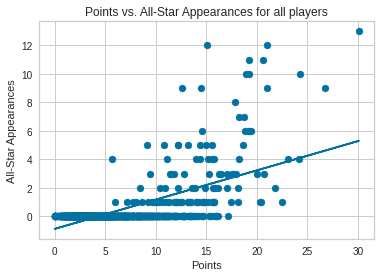

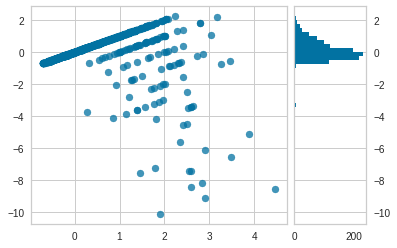

Mean squared error = 1.2105460542946473
Root mean squared error = 1.100248178500945
R2 score = 0.3172618200767512


In [78]:
# Set up linear regression model and variables
model = LinearRegression()
x = dfClean['PTS']
X = x[:, np.newaxis]
y = dfClean['ALL_STAR_APPEARANCES']

# Partition the data into train and test splits
print(y.shape)
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

y_predicted = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predicted)

# Title
plt.title("Points vs. All-Star Appearances for all players")

# Labels
plt.xlabel('Points')
plt.ylabel('All-Star Appearances')

plt.show()

# Instantiate the linear model and the visualizer
#ridge = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_test, y_test)
plt.show()

# Mean squared error
mse = mean_squared_error(y_test, y_predicted)
print("Mean squared error =", mse)

# Root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error =", rmse)


# R2 Score
print("R2 score =", sm.r2_score(y_test, y_predicted))



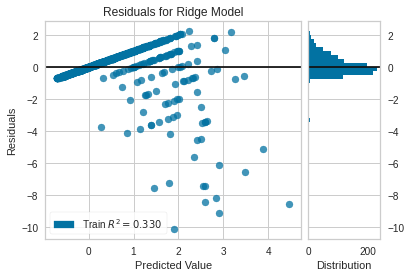

In [79]:
# Generate model
model1 = Ridge()

# Title
plt.title("Residuals for LinearRegression Model")

visualizer = ResidualsPlot(model1)
visualizer.fit(X_test, y_test)
visualizer.poof()

**Linear Regression for PTS vs. All Star-Appearances for players with at least one All-Star Appearance**

(248,)
(248, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


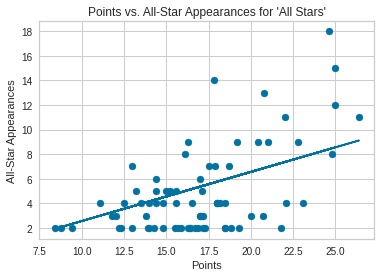

(248,)
(75,)
Mean squared error = 8.682695158490784
Root mean squared error = 2.9466413352308054
R2 score = 0.29580482919270623


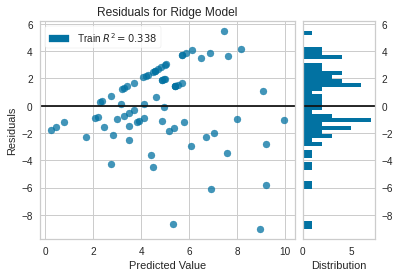

In [80]:
# Model a linear regression for players with at least one all star appearance
atLeastOneASA = dfClean[dfClean['ALL_STAR_APPEARANCES'] > 1]  

# Set up linear regression model and variables
model = LinearRegression()
x = atLeastOneASA['PTS']
X = x[:, np.newaxis]
y = atLeastOneASA['ALL_STAR_APPEARANCES']

# Partition the data into train and test splits
print(y.shape)
print(X.shape)

# Change X_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

# Predict
y_predicted = model.predict(X_test)

# Visualize the data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predicted)

# Title
plt.title("Points vs. All-Star Appearances for 'All Stars'")

# Labels
plt.xlabel('Points')
plt.ylabel('All-Star Appearances')

plt.show()

# Print y and y predicted
print(y.shape)
print(y_predicted.shape)

# Mean squared error
mse = mean_squared_error(y_test, y_predicted)
print("Mean squared error =", mse)

# Root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error =", rmse)


# R2 Score
print("R2 score =", sm.r2_score(y_test, y_predicted))

# Instantiate the linear model and the visualizer
model1 = Ridge()
visualizer = ResidualsPlot(model1)
visualizer.fit(X_test, y_test)
visualizer.poof()
# plt.show()

**Linear Regression for Season Experience vs. All Star Appearances**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


(4056,)
(4056, 1)


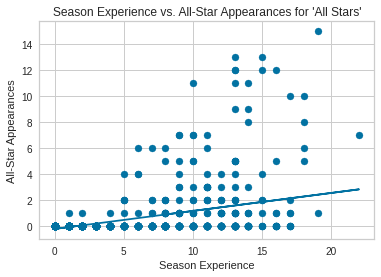

(4056,)
(1217,)
Mean squared error = 1.9812322638259425
Root mean squared error = 1.4075625257252136
R2 score = 0.1715313406749811


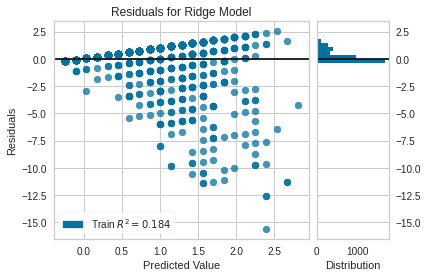

In [81]:
# Set up linear regression model and variables
model = LinearRegression()
x = dfClean['SEASON_EXP']
X = x[:, np.newaxis]
y = dfClean['ALL_STAR_APPEARANCES']

# Partition the data into train and test splits
print(y.shape)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

y_predicted = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predicted)

# Title
plt.title("Season Experience vs. All-Star Appearances for 'All Stars'")

# Labels
plt.xlabel('Season Experience')
plt.ylabel('All-Star Appearances')

plt.show()

# Print y and y predicted
print(y.shape)
print(y_predicted.shape)

# Mean squared error
mse = mean_squared_error(y_test, y_predicted)
print("Mean squared error =", mse)

# Root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error =", rmse)


# R2 Score
print("R2 score =", sm.r2_score(y_test, y_predicted))

# Instantiate the linear model and the visualizer
model1 = Ridge()
visualizer = ResidualsPlot(model1)
visualizer.fit(X, y)
visualizer.poof()

(248,)
(248, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


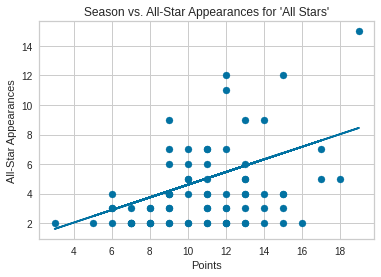

(248,)
(75,)
Mean squared error = 6.872932241225593
Root mean squared error = 2.621627784645561
R2 score = 0.07066721497851058


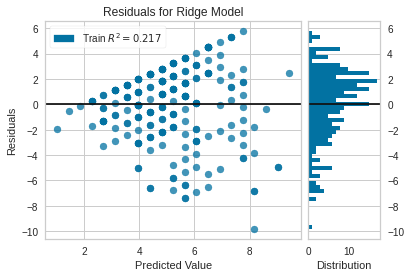

In [82]:
# Set up linear regression model and variables
model = LinearRegression()
x = atLeastOneASA['SEASON_EXP']
X = x[:, np.newaxis]
y = atLeastOneASA['ALL_STAR_APPEARANCES']

# Partition the data into train and test splits
print(y.shape)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

y_predicted = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predicted)

# Title
plt.title("Season vs. All-Star Appearances for 'All Stars'")

# Labels
plt.xlabel('Points')
plt.ylabel('All-Star Appearances')

plt.show()

# Print y and y predicted
print(y.shape)
print(y_predicted.shape)

# Mean squared error
mse = mean_squared_error(y_test, y_predicted)
print("Mean squared error =", mse)

# Root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error =", rmse)


# R2 Score
print("R2 score =", sm.r2_score(y_test, y_predicted))

# Instantiate the linear model and the visualizer
model1 = Ridge()
visualizer = ResidualsPlot(model1)
visualizer.fit(X, y)
visualizer.poof()
# plt.show()

**Logistic Regression on PTS vs. All Star Appearances**

In [83]:
# Logistic regression for all players
model2 = LogisticRegression()

x = dfClean['PTS']
X = x[:, np.newaxis]
y = dfClean['ALL_STAR_APPEARANCES']

model2.fit(X_train, y_train)
model2.score(X_train, y_train)
model2.score(X_test, y_test)

y_predicted2 = model2.predict(X_test)

# print(y_pred)
print(y_test.shape)
print(y_predicted2.shape)

# Evaluate performance
print("Accuracy score (PTS)=",sm.accuracy_score(y_test, y_predicted2))
cnf_matrix = sm.confusion_matrix(y_test, y_predicted2)

(75,)
(75,)
Accuracy score (PTS)= 0.32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
# Logistic regression for 'All Stars'
model4 = LogisticRegression()

x = atLeastOneASA['PTS']
X = x[:, np.newaxis]
y = atLeastOneASA['ALL_STAR_APPEARANCES']

model4.fit(X_train, y_train)
model4.score(X_train, y_train)
model4.score(X_test, y_test)

y_predicted2 = model4.predict(X_test)

# print(y_pred)
print(y_test.shape)
print(y_predicted2.shape)

# Evaluate performance
print("Accuracy score for 'PTS' model=", sm.accuracy_score(y_test, y_predicted2))

(75,)
(75,)
Accuracy score for 'PTS' model= 0.32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Logistic Regression for Season Experience vs. All Star Appearances**

In [85]:
# Logistic Regression of Season EXP for all players
model3 = LogisticRegression()
x = dfClean['SEASON_EXP']
X = x[:, np.newaxis]
y = dfClean['ALL_STAR_APPEARANCES']

# Partition the data into train and test splits
print(y.shape)
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model3.fit(X_train, y_train)
model3.score(X_train, y_train)
model3.score(X_test, y_test)

y_predicted = model3.predict(X_test)


# Evaluate performance
print("Accuracy score (SEASON_EXP)= ", sm.accuracy_score(y_test, y_predicted))

print(sm.classification_report(y_test, y_predicted))

cnf_matrix = sm.confusion_matrix(y_test, y_predicted)
# print(cnf_matrix)

# sm.plot_confusion_matrix(model3, X_test, y_test)
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


(4056,)
(4056, 1)
Accuracy score (SEASON_EXP)=  0.9112571898110107
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1108
         1.0       0.12      0.03      0.05        32
         2.0       0.00      0.00      0.00        24
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         9
         6.0       0.00      0.00      0.00         7
         7.0       0.00      0.00      0.00        10
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1

    accuracy                           0.91      1217
   macro avg       0.07      0.07      0.07      1217
weighted avg 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# Logistic Regression of Season EXP for all players
model5 = LogisticRegression()
x = atLeastOneASA['SEASON_EXP']
X = x[:, np.newaxis]
y = atLeastOneASA['ALL_STAR_APPEARANCES']

# Partition the data into train and test splits
print(y.shape)
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model5.fit(X_train, y_train)
model5.score(X_train, y_train)
model5.score(X_test, y_test)

y_predicted = model5.predict(X_test)


# Evaluate performance
print(sm.accuracy_score(y_test, y_predicted))

print(sm.classification_report(y_test, y_predicted))


cnf_matrix = sm.confusion_matrix(y_test, y_predicted)

(248,)
(248, 1)
0.30666666666666664
              precision    recall  f1-score   support

         2.0       0.35      0.92      0.51        25
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00        13
         5.0       0.00      0.00      0.00         8
         6.0       0.00      0.00      0.00         8
         7.0       0.00      0.00      0.00         7
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1

    accuracy                           0.31        75
   macro avg       0.03      0.07      0.04        75
weighted avg       0.12      0.31      0.17        75



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic